# Determination of a promising tariff for a telecom company #

The purpose of the study is to identify the most cost-effective tariff of the two currently existing in the company.  
To achieve this goal, we will analyze the behavior of subscribers using one of the studied tariffs.  
For the analysis, we will use a data sample of 5,000 subscribers.  

Content:
1. [Getting to know the data](#paragraph1)  
 1.1. [General information](#paragraph1.1)  
   1.1.1. [Users](#paragraph1.1.1)  
   1.1.2. [Calls](#paragraph1.1.2)  
   1.1.3. [Messages](#paragraph1.1.3)  
   1.1.4. [Internet](#paragraph1.1.4)  
   1.1.5. [Tariffs](#paragraph1.1.5)  
2. [Calculation of subscribers expenses](#paragraph2)  
3. [Data analysis](#paragraph3)
4. [Description of the client's behavior](#paragraph4)
5. [Hypothesis testing](#paragraph5)  
 5.1. [The average revenue of users of the "Ultra" and "Smart" tariffs differs](#paragraph5_1)  
 5.2. [The average revenue of users from Moscow differs from the revenue of users from other regions](#paragraph5_2)
6. [General conclusion](#paragraph6)
   

## 1. Getting to know the data  <a name="paragraph1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Let's upload the data and take a close look at them:

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### 1.1. Let's study the general information and put the data in order  <a name="#paragraph1.1"></a>

#### 1.1.1. Users <a name="paragraph1.1.1"></a>

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Omissions were found in large numbers in the **churn_rate** column.  
We will not fill them out, because:  
a) This column contains data on the termination of the use of the tariff. If the values are omitted, the tariff is still valid  
b) Omissions in this column do not interfere with our research  

**Let's check users for uniqueness:**

In [6]:
print("Number of rows in the table users:", users.shape[0])
print("Number of unique users:", users['user_id'].count())
print("Number of duplicates:", users.duplicated().sum())

Number of rows in the table users: 500
Number of unique users: 500
Number of duplicates: 0


**All users are unique**

For further work with the date frame, you need to add the **Month** column and convert the date column to the **datetime format**  
For these purposes, we will write a function:

In [7]:

def date_to_dt(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['месяц'] = df[column].apply(lambda x: x.month)
                

In [8]:
date_to_dt([users])

In [9]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
месяц         500 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.3+ KB


### 1.1.2. Calls <a name="paragraph1.1.2"></a>

In [11]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


The data is complete - without omissions, but it is necessary to change the date format in the **call_date column**

In [13]:
date_to_dt([calls])

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
месяц        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [15]:
calls.head()

,id,call_date,duration,user_id,месяц
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


The date format has changed, the seasons have been added. We can work with the file further.

In [16]:
calls.describe()

,duration,user_id,месяц
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


There are a lot of zero values for the duration of the conversation. Let's build a graph in order to see how the duration is distributed:

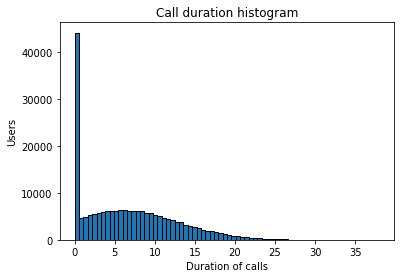

In [17]:
calls['duration'].plot(kind='hist', ec='black', bins=70)
plt.title('Call duration histogram')
plt.ylabel('Users')
plt.xlabel('Duration of calls')
plt.show()

Let's check if all calls less than a minute have a value of 0:

In [18]:
calls.query('0 < duration < 0.9')

,id,call_date,duration,user_id,месяц
55,1000_55,2018-09-19,0.31,1000,9
65,1000_65,2018-10-28,0.34,1000,10
97,1000_97,2018-10-26,0.33,1000,10
122,1000_122,2018-10-07,0.13,1000,10
135,1000_135,2018-10-25,0.02,1000,10
...,...,...,...,...,...
202484,1499_97,2018-12-22,0.07,1499,12
202537,1499_150,2018-12-09,0.56,1499,12
202545,1499_158,2018-11-16,0.64,1499,11
202579,1499_192,2018-12-07,0.76,1499,12


According to the condition, calls are charged per minute. Accordingly, if the call was less than a minute, the subscriber will be charged for a minute. Therefore, we will round up all calls lasting less than 1 minute to an integer

In [19]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [20]:
calls.query('0 < duration < 0.9')

,id,call_date,duration,user_id,месяц


In [21]:
calls.head()

,id,call_date,duration,user_id,месяц
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


The values were rounded to the minute.  
Since calls lasting **0 minutes** are not charged (most likely they are just failed connections), we will get rid of them
But first, let's check if they belong to the same tariff (in this case, there is a high probability that calls with a duration of less than a minute were accidentally rounded to 0 on some tariff)

In [22]:
#fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
#calls['Тариф'] = calls['user_id'].map(fill_tariff)
#calls['Тариф'].value_counts()

No, there are zero calls in both tariffs  
We can get rid of them:

In [23]:
#calls['duration'] = calls['duration'].replace(0, np.NaN)
#calls = calls.dropna()

In [24]:
calls = calls.query('duration > 0')

In [25]:
calls.head()

,id,call_date,duration,user_id,месяц
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
месяц        162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.5+ MB


The zero values are gone. Let's look at the graph now

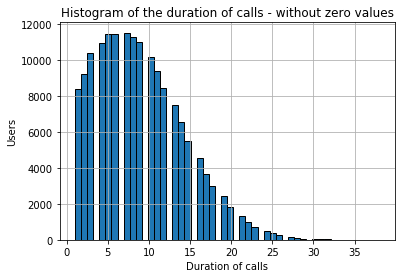

In [27]:
calls['duration'].plot(kind='hist', ec='black', grid = True, bins=50)
plt.title('Histogram of the duration of calls - without zero values')
plt.ylabel('Users')
plt.xlabel('Duration of calls')
plt.show()

#### 1.1.3. Messages <a name="paragraph1.1.3"></a>

In [28]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [29]:
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Change the data format in the **message_date column**

In [30]:
date_to_dt([messages])

In [31]:
messages.head()

,id,message_date,user_id,месяц
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
месяц           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


There are no more claims to this table)).  
Let's move on to the next:

#### 1.1.4. Internet  <a name="paragraph1.1.4"></a>

In [33]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [34]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


It is necessary to change the format of the **session_date column**

In [35]:
date_to_dt([internet])

In [36]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
месяц           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


We will not round the values of the megabytes spent by the user, since the tariffs have a fixed Internet package and the task does not say that the operator rounds the megabytes spent.  
However, it is worth looking at the zero values in Internet sessions and getting rid of them, if any.  
Zero connections are not charged and do not participate in calculations.  

In [37]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id,месяц
11,11,1000_11,0.0,2018-08-28,1000,8
38,38,1000_38,0.0,2018-11-27,1000,11
46,46,1000_46,0.0,2018-06-30,1000,6
67,67,1000_67,0.0,2018-06-16,1000,6
72,72,1000_72,0.0,2018-06-15,1000,6
...,...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499,12
149381,149381,1499_142,0.0,2018-11-01,1499,11
149383,149383,1499_144,0.0,2018-11-27,1499,11
149386,149386,1499_147,0.0,2018-10-21,1499,10


In [38]:
#Избавимся от 0 значений
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

In [39]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id,месяц


We got rid of zero connections successfully.
Let's round up the traffic values according to the Megaline tariff rules:

In [40]:
internet['mb_used'] = np.ceil(internet['mb_used'])

 Посмотрим на график, нет ли еще каких-то аномалий в значениях расходования пакета интернета пользователями:

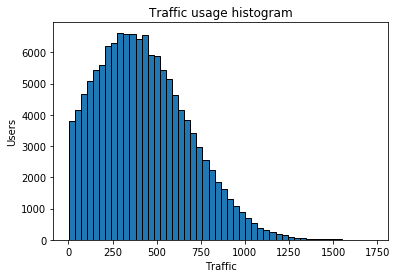

In [41]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)
plt.title('Traffic usage histogram')
plt.ylabel('Users')
plt.xlabel('Traffic')
plt.show()

The data in the graph is distributed normally.
Note that the majority of users use the Internet very little (at least by my standards :))
And very rarely, which of the users overspends traffic

#### 1.1.5 tariffs <a name="paragraph1.1.5"></a>

In [42]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


There is nothing to do with the table - Use it as reference information.

## 2. Let's calculate the subscribers expenses according to the tariffs <a name="paragraph2"></a>

In [43]:
calls.head(10)

,id,call_date,duration,user_id,месяц
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
10,1000_10,2018-08-22,6.0,1000,8
11,1000_11,2018-05-28,19.0,1000,5
12,1000_12,2018-07-05,3.0,1000,7
13,1000_13,2018-09-29,8.0,1000,9
14,1000_14,2018-12-11,10.0,1000,12


Let's calculate the subscribers' expenses in each table and bring them into one table

In [44]:
n_calls = calls.groupby(['user_id', 'месяц'])['duration'].agg(['count', 'sum'])
n_messages = messages.groupby(['user_id', 'месяц'])['id'].count()
n_internet = internet.groupby(['user_id', 'месяц']).sum()['mb_used']

In [45]:
df_pivot = pd.concat([n_calls, n_messages, n_internet], axis=1)
df_pivot = df_pivot.reset_index()
df_pivot.head()

,user_id,месяц,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


In order for the table to be fully ready for operation, we will add columns with the values of the city and tariff

In [46]:
add_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df_pivot['Тариф'] = df_pivot['user_id'].map(add_tariff)
add_city = dict(pd.Series(users['city'].values, index=users['user_id']))
df_pivot['Город'] = df_pivot['user_id'].map(add_city)

In [47]:
df_pivot.head()

,user_id,месяц,count,sum,id,mb_used,Тариф,Город
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар


Rename the columns

In [48]:
df_pivot.columns = ['User_id', 'Месяц', 'Кол-во звонков, шт', 'Звонки, мин', 
                            'СМС, шт', 'Интернет, Мб', 'Тариф', 'Город']

In [49]:
df_pivot.head(20)

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва


In [50]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id               3214 non-null int64
Месяц                 3214 non-null int64
Кол-во звонков, шт    3168 non-null float64
Звонки, мин           3168 non-null float64
СМС, шт               2717 non-null float64
Интернет, Мб          3201 non-null float64
Тариф                 3214 non-null object
Город                 3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


In [51]:
df_pivot[df_pivot['СМС, шт'].isnull()]

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва
42,1006,2,3.0,42.0,NaN,1395.0,smart,Ульяновск
43,1006,3,36.0,286.0,NaN,17309.0,smart,Ульяновск
44,1006,4,38.0,356.0,NaN,13954.0,smart,Ульяновск
...,...,...,...,...,...,...,...,...
3181,1494,8,26.0,262.0,NaN,6601.0,smart,Омск
3182,1494,9,57.0,501.0,NaN,16986.0,smart,Омск
3183,1494,10,45.0,354.0,NaN,17794.0,smart,Омск
3184,1494,11,46.0,411.0,NaN,18076.0,smart,Омск


In the table there are gaps in the data on the expenditure of both minutes and SMS and Traffic.  
Let's see if there are users who have not used the Operator's services at all.  
If there are such, then it will be necessary to exclude from the table

In [52]:
df_pivot[(df_pivot['СМС, шт'].isnull()) & (df_pivot['Кол-во звонков, шт'].isnull()) & (df_pivot['Интернет, Мб'].isnull())]

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город


There are no such subscribers: has anyone used anything  
Therefore, we will simply fill in the missing values 0, but we will not delete them from the table

In [53]:
df_pivot = df_pivot.fillna(0)

In [54]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id               3214 non-null int64
Месяц                 3214 non-null int64
Кол-во звонков, шт    3214 non-null float64
Звонки, мин           3214 non-null float64
СМС, шт               3214 non-null float64
Интернет, Мб          3214 non-null float64
Тариф                 3214 non-null object
Город                 3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


Now that we have a summary table with up-to-date data, we can proceed to calculating the revenue that the operator receives from each subscriber.

Let's add a column with the value of the subscription fee to the table

In [55]:
month_fee = {'smart': 550, 'ultra': 1950}
df_pivot['Аб. плата'] = df_pivot['Тариф'].map(month_fee)

In [56]:
df_pivot.head()

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город,Аб. плата
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950


Let's write a function for calculating monthly revenue from each user:

In [57]:
def calls_over(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_sum(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты_Extra']) * 3
        sum_per_month += row['СМС_Extra'] * 3
        sum_per_month += np.ceil(row['Мб_Extra']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты_Extra']) * 1
        sum_per_month += row['СМС_Extra'] * 1
        sum_per_month += np.ceil(row['Мб_Extra']/1024) * 150
        return sum_per_month

Add columns to the table:

In [58]:
df_pivot['Минуты_Extra'] = df_pivot.apply(calls_over, axis=1)
df_pivot['СМС_Extra'] = df_pivot.apply(sms_over, axis=1)
df_pivot['Мб_Extra'] = df_pivot.apply(internet_over, axis=1)

df_pivot['Плата сверх лимита, руб.'] = df_pivot.apply(month_sum, axis=1)

for column in ['Минуты_Extra', 'Мб_Extra']:
    df_pivot[column] = df_pivot[column].astype('float')

for column in ['СМС_Extra', 'Плата сверх лимита, руб.']:
    df_pivot[column] = df_pivot[column].astype('int')

In [59]:
df_pivot.head(10)

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город,Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб."
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0
8,1001,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800
9,1001,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0


In [60]:
df_pivot.describe().T

,count,mean,std,min,25%,50%,75%,max
User_id,3214.0,1251.590230,144.659172,1000.0,1125.00,1253.0,1378.75,1499.0
Месяц,3214.0,8.317362,2.905413,1.0,6.00,9.0,11.00,12.0
"Кол-во звонков, шт",3214.0,50.713752,26.951413,0.0,32.00,50.0,66.00,190.0
"Звонки, мин",3214.0,451.244866,241.909978,0.0,282.00,443.0,589.00,1673.0
"СМС, шт",3214.0,38.281269,36.148326,0.0,9.00,30.0,57.00,224.0
"Интернет, Мб",3214.0,17227.585252,7578.261501,0.0,12505.25,16966.5,21450.00,49789.0
Аб. плата,3214.0,979.060361,645.539596,550.0,550.00,550.0,1950.00,1950.0
Минуты_Extra,3214.0,28.854698,73.077172,0.0,0.00,0.0,0.00,935.0
СМС_Extra,3214.0,4.022402,11.508916,0.0,0.00,0.0,0.00,93.0
Мб_Extra,3214.0,2152.738021,3418.309013,0.0,0.00,0.0,3575.00,23250.0


In [61]:
df_pivot.head()

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город,Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб."
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0


In [62]:
df_smart_clear = df_pivot.query('Тариф == "smart"')
df_ultra_clear = df_pivot.query('Тариф == "ultra"')

Let's make a small digression and look carefully at the data overruns. Let's compare the results:

In [63]:
df_all = df_pivot['User_id'].nunique()

In [64]:
df_pivot_smart = df_pivot.query('Тариф == "smart"')

In [65]:
df_smart = df_pivot_smart['User_id'].nunique()

In [66]:
df_pivot_smart_0 = df_pivot.query('Мб_Extra > 0 & Тариф == "smart"')

In [67]:
df_smart_0 = df_pivot_smart_0['User_id'].nunique()

In [68]:
df_pivot_smart_3000 = df_pivot.query('Мб_Extra > 3000 & Тариф == "smart"')

In [69]:
df_smart_3000 = df_pivot_smart_3000['User_id'].nunique()

In [70]:
df_pivot_ultra = df_pivot.query('Тариф == "ultra"')

In [71]:
df_ultra = df_pivot_ultra['User_id'].nunique()

In [72]:
df_pivot_ultra_0 = df_pivot.query('Мб_Extra > 0 & Тариф == "ultra"')

In [73]:
df_ultra_0 = df_pivot_ultra_0['User_id'].nunique()

In [74]:
df_pivot_ultra_3000 = df_pivot.query('Мб_Extra > 3000 & Тариф == "ultra"')

In [75]:
df_ultra_3000 = df_pivot_ultra_3000['User_id'].nunique()

In [76]:
df_pivot_v = {'Total use of traffic': df_all, 'Smart tariff users':df_smart, 'Ultra tariff users':df_ultra, 'Overspending on Smart':df_smart_0,
             'Large overspending on Smart':df_smart_3000,'Overspending on Ultra':df_ultra_0, 'Large overspending on Ultra':df_ultra_3000}
print("{:<25} {:<15}".format('Name','Value'))
for v in df_pivot_v.items():
    name, val = v
    print("{:<20} {:<15}".format(name, val))

Name                      Value          
Total use of traffic 498            
Smart tariff users   350            
Ultra tariff users   148            
Overspending on Smart 312            
Large overspending on Smart 254            
Overspending on Ultra 43             
Large overspending on Ultra 33             


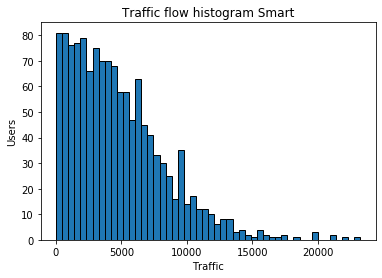

In [77]:
df_pivot_smart_0['Мб_Extra'].plot(kind='hist', ec='black', bins=50)
plt.title('Traffic flow histogram Smart')
plt.ylabel('Users')
plt.xlabel('Traffic')
plt.show()

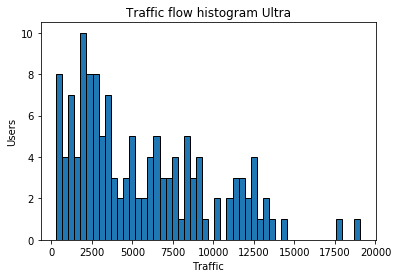

In [78]:
df_pivot_ultra_0['Мб_Extra'].plot(kind='hist', ec='black', bins=50)
plt.title('Traffic flow histogram Ultra')
plt.ylabel('Users')
plt.xlabel('Traffic')
plt.show()

The ultra tariff is initially chosen by people who do not really need the Internet, but if there is an overspend, then it greatly exceeds the prepaid package  
The Smart overspending rate is quantitatively higher (two-thirds of subscribers), but it is comparable to a prepaid package.
I assume that the people who allowed traffic overruns on the Ultra tariff chose the tariff unconsciously.
Due to the large expenditure of funds, they may switch to another operator, so marketers should hurry up with the formation of a special offer for them.

## 3. Data analysis <a name="paragraph3"></a>

Let's collect a table of expenses of each unique user for the entire period in which the sample was made

In [79]:
df_unique = df_pivot.groupby(['User_id', 'Тариф','Город']).sum().reset_index()

In [80]:
df_unique.head()

,User_id,Тариф,Город,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб."
0,1000,ultra,Краснодар,68,293.0,2566.0,496.0,107492.0,15600,0.0,0,0.0,0
1,1001,smart,Москва,23,92.0,844.0,0.0,32505.0,1100,0.0,0,3092.0,800
2,1002,smart,Стерлитамак,63,173.0,1517.0,70.0,116183.0,3850,0.0,0,14607.0,3400
3,1003,ultra,Москва,50,428.0,3822.0,380.0,57329.0,9750,0.0,0,0.0,0
4,1004,ultra,Новокузнецк,68,139.0,987.0,1192.0,149172.0,15600,0.0,0,0.0,0


In [81]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
User_id                     498 non-null int64
Тариф                       498 non-null object
Город                       498 non-null object
Месяц                       498 non-null int64
Кол-во звонков, шт          498 non-null float64
Звонки, мин                 498 non-null float64
СМС, шт                     498 non-null float64
Интернет, Мб                498 non-null float64
Аб. плата                   498 non-null int64
Минуты_Extra                498 non-null float64
СМС_Extra                   498 non-null int64
Мб_Extra                    498 non-null float64
Плата сверх лимита, руб.    498 non-null int64
dtypes: float64(6), int64(5), object(2)
memory usage: 50.7+ KB


In [82]:
df_unique.describe()

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб."
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,1249.500000,53.678715,327.297189,2912.251004,247.060241,111183.652610,6318.674699,186.222892,25.959839,13893.373494,3572.391566
std,144.566935,20.779894,236.437246,2103.125922,267.537538,70550.579355,5762.325836,380.396611,74.477809,17803.443479,4121.532376
min,1000.000000,12.000000,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000,0.000000,0.000000,0.000000
25%,1124.250000,34.500000,142.000000,1245.500000,44.000000,54476.250000,2750.000000,0.000000,0.000000,0.000000,27.750000
50%,1249.500000,57.000000,276.500000,2455.500000,165.000000,101147.500000,4400.000000,0.000000,0.000000,6507.000000,2084.500000
75%,1374.750000,72.000000,470.000000,4210.750000,370.000000,153595.500000,6600.000000,195.000000,0.750000,21494.000000,5390.250000
max,1499.000000,78.000000,1424.000000,12973.000000,1463.000000,376754.000000,23400.000000,2694.000000,579.000000,98543.000000,21951.000000


Let's create an additional column in order to determine whether users went beyond the limits provided by the tariffs

In [83]:
df_unique['Переплата'] = np.where(df_unique['Плата сверх лимита, руб.'] > 0, 1, 0)


In [84]:
df_unique.head()

,User_id,Тариф,Город,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб.",Переплата
0,1000,ultra,Краснодар,68,293.0,2566.0,496.0,107492.0,15600,0.0,0,0.0,0,0
1,1001,smart,Москва,23,92.0,844.0,0.0,32505.0,1100,0.0,0,3092.0,800,1
2,1002,smart,Стерлитамак,63,173.0,1517.0,70.0,116183.0,3850,0.0,0,14607.0,3400,1
3,1003,ultra,Москва,50,428.0,3822.0,380.0,57329.0,9750,0.0,0,0.0,0,0
4,1004,ultra,Новокузнецк,68,139.0,987.0,1192.0,149172.0,15600,0.0,0,0.0,0,0


Let's see what percentage of users went beyond the limit of services for each of the tariffs  
To do this, we will draw pie charts for each of the tariffs

In [85]:
df_unique_ultra = df_unique.query('Тариф == "ultra"')
df_unique_smart = df_unique.query('Тариф == "smart"')


In [86]:
df_unique_ultra = df_unique_ultra.pivot_table(index = 'Переплата', values = 'User_id', aggfunc = 'count')
df_unique_smart = df_unique_smart.pivot_table(index = 'Переплата', values = 'User_id', aggfunc = 'count')

In [87]:
df_unique_ultra

,User_id
Переплата,
0,105
1,43


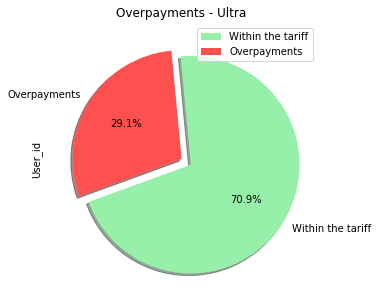

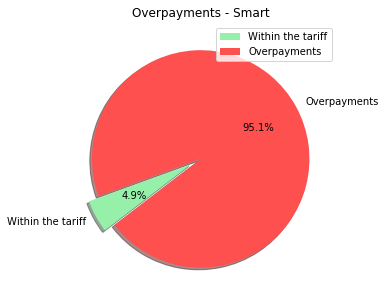

In [88]:

df_unique_ultra.plot(kind='pie', y = 'User_id', autopct='%1.1f%%', title = 'Overpayments - Ultra',
                     labels=['Within the tariff', 'Overpayments'], explode = (0.1, 0), shadow=True, colors = ['#97F0AA', '#ff5050'], figsize=(20,5), startangle=200)


df_unique_smart.plot(kind='pie', y = 'User_id', autopct='%1.1f%%', title = 'Overpayments - Smart',
                     labels= ['Within the tariff', 'Overpayments'], use_index = False, explode = (0.1, 0), shadow=True, colors = ['#97F0AA', '#ff5050'], figsize=(20,5), startangle=200)

plt.ylabel('')
plt.xlabel('')
plt.show()

As we can see, subscribers of the **Ultra** tariff mostly have enough paid services, but users of the **Smart** tariff are clearly not enough.  
Perhaps it's all about the Internet package, as we said earlier?  
Let's build a summary table of overpayments:

In [89]:
(df_unique.groupby('Тариф').sum()[['Минуты_Extra', 'СМС_Extra', 'Мб_Extra']]).reset_index()

,Тариф,Минуты_Extra,СМС_Extra,Мб_Extra
0,smart,92739.0,12928,6175667.0
1,ultra,0.0,0,743233.0


Customers of the **Smart** tariff overpay for all services, but especially a lot for Internet traffic  
Customers of the **Ultra** tariff have enough of everything except traffic

Let's build histograms of expenses of customers of both tariffs:

**Overpayments according to the SMART tariff**

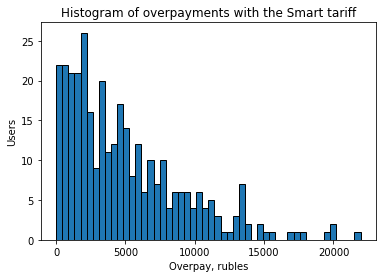

In [90]:
title = 'Histogram of overpayments with the Smart tariff'
df_smart_f = df_unique[(df_unique['Тариф'] == 'smart') & 
                               (df_unique['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_smart_f.plot(kind='hist', title=title, ec='black', bins=50)
plt.ylabel('Users')
plt.xlabel('Overpay, rubles')
plt.show()

Most customers overpay less than 2000. Let's try to take a look at this group:

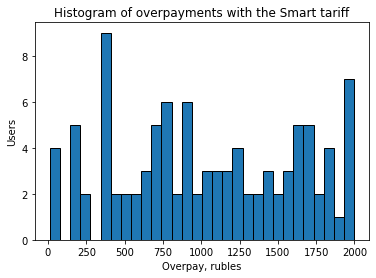

In [91]:
title = 'Histogram of overpayments with the Smart tariff'
df_smart_f = df_unique[(df_unique['Тариф'] == 'smart') & 
                               (df_unique['Плата сверх лимита, руб.'] > 0) & 
                               (df_unique['Плата сверх лимита, руб.'] < 2000)]['Плата сверх лимита, руб.']
df_smart_f.plot(kind='hist', title=title, ec='black', bins=30)
plt.ylabel('Users')
plt.xlabel('Overpay, rubles')
plt.show()

We observe uniform jumps - everything indicates that customers are ordering an Internet package

**Overpayments with the Ultra tariff**

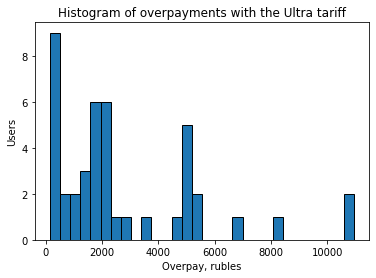

In [92]:
title = 'Histogram of overpayments with the Ultra tariff'
df_smart_f = df_unique[(df_unique['Тариф'] == 'ultra') & 
                               (df_unique['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_smart_f.plot(kind='hist', title=title, ec='black', bins=30)
plt.ylabel('Users')
plt.xlabel('Overpay, rubles')
plt.show()

We clearly see that customers are ordering Internet packages

##### Comparison of tariff revenue

In [93]:
df_unique['Общая сумма'] = df_unique['Аб. плата'] + df_unique['Плата сверх лимита, руб.']

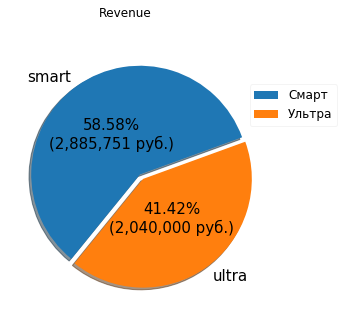

In [94]:
all_revenue = df_unique['Общая сумма'].sum()

def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_unique.groupby('Тариф')['Общая сумма'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Revenue', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

In [95]:
df_unique_u = df_unique.groupby('Тариф').count()['User_id']


In [96]:
df_unique_u

Тариф
smart    350
ultra    148
Name: User_id, dtype: int64

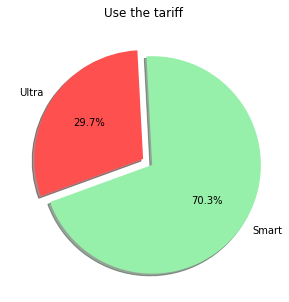

In [97]:
df_unique_u.plot(kind='pie', y = 'User_id', autopct='%1.1f%%', title = 'Use the tariff',
                     labels=['Smart', 'Ultra'], explode = (0.1, 0), shadow=True, colors = ['#97F0AA', '#ff5050'], figsize=(20,5), startangle=200)
plt.ylabel('')
plt.xlabel('')
plt.show()

The **Ultra** tariff generates 41% of revenue, although only 30% of users use it.  
It is not surprising, because the subscription fee for this tariff is three times higher ... Let's  
look at the summary table with expenses for these tariffs:

In [98]:
df_unique

,User_id,Тариф,Город,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб.",Переплата,Общая сумма
0,1000,ultra,Краснодар,68,293.0,2566.0,496.0,107492.0,15600,0.0,0,0.0,0,0,15600
1,1001,smart,Москва,23,92.0,844.0,0.0,32505.0,1100,0.0,0,3092.0,800,1,1900
2,1002,smart,Стерлитамак,63,173.0,1517.0,70.0,116183.0,3850,0.0,0,14607.0,3400,1,7250
3,1003,ultra,Москва,50,428.0,3822.0,380.0,57329.0,9750,0.0,0,0.0,0,0,9750
4,1004,ultra,Новокузнецк,68,139.0,987.0,1192.0,149172.0,15600,0.0,0,0.0,0,0,15600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1495,ultra,Иркутск,50,466.0,3920.0,340.0,127536.0,9750,0.0,0,10637.0,1800,1,11550
494,1496,smart,Вологда,78,667.0,5984.0,468.0,271269.0,6600,516.0,1,98543.0,21951,1,28551
495,1497,smart,Челябинск,33,156.0,1406.0,51.0,45626.0,1650,45.0,0,4580.0,1135,1,2785
496,1498,smart,Владикавказ,34,146.0,1293.0,168.0,74526.0,2200,0.0,12,20960.0,4436,1,6636


In [99]:
df_unique_sum = df_unique.groupby('Тариф').sum()[['Звонки, мин', 'СМС, шт', 'Интернет, Мб','Аб. плата', 'Плата сверх лимита, руб.', 'Общая сумма']]

In [100]:
df_pivot_sum = pd.concat([df_unique_u, df_unique_sum], axis=1)

In [101]:
df_pivot_sum

,User_id,"Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,"Плата сверх лимита, руб.",Общая сумма
Тариф,,,,,,,
smart,350,931577.0,74413.0,36174861.0,1225950,1659801,2885751
ultra,148,518724.0,48623.0,19194598.0,1920750,119250,2040000


The number of subscribers of the **Smart** tariff is larger, they actively communicate, so they cover the lower cost of the tariff with their costs.

## 4. Description of the client's behavior based on the received sample  <a name="#paragraph4"></a>

Let's build histograms, look at and compare how many calls, minutes and traffic the tariff users need:

We will work with tables in which data on tariffs are summarized without grouping by unique users and summing up the values by expenses, since it is these data that will give us the correct information about the average values:   
- **df_smart_clear**  
- **df_ultra_clear**

#### Distribution by SMS:

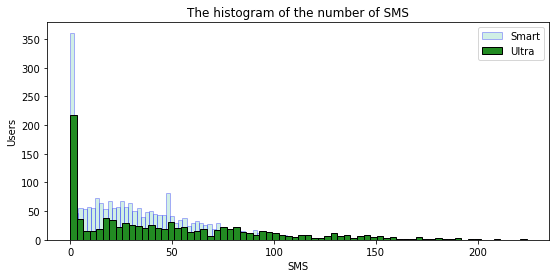

In [102]:
ax = plt.gca()
df_smart_clear.plot(x = 'User_id', y = 'СМС, шт', kind = 'hist', bins = 70, ax = ax, alpha = 0.3, ec='blue', figsize=(9,4), color='mediumaquamarine')
df_ultra_clear.plot(x = 'User_id', y = 'СМС, шт', kind = 'hist', bins = 70, ax = ax, ec='black', figsize=(9,4), color='forestgreen')

plt.legend(['Smart', 'Ultra'])
plt.title('The histogram of the number of SMS')
plt.ylabel('Users')
plt.xlabel('SMS')
plt.show()

Let's remove the outliers and take a closer look at the data

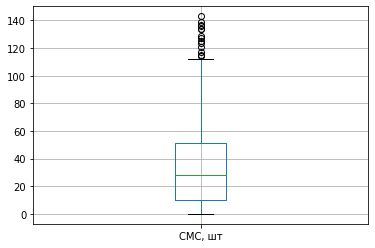

In [103]:
df_smart_clear.boxplot('СМС, шт')


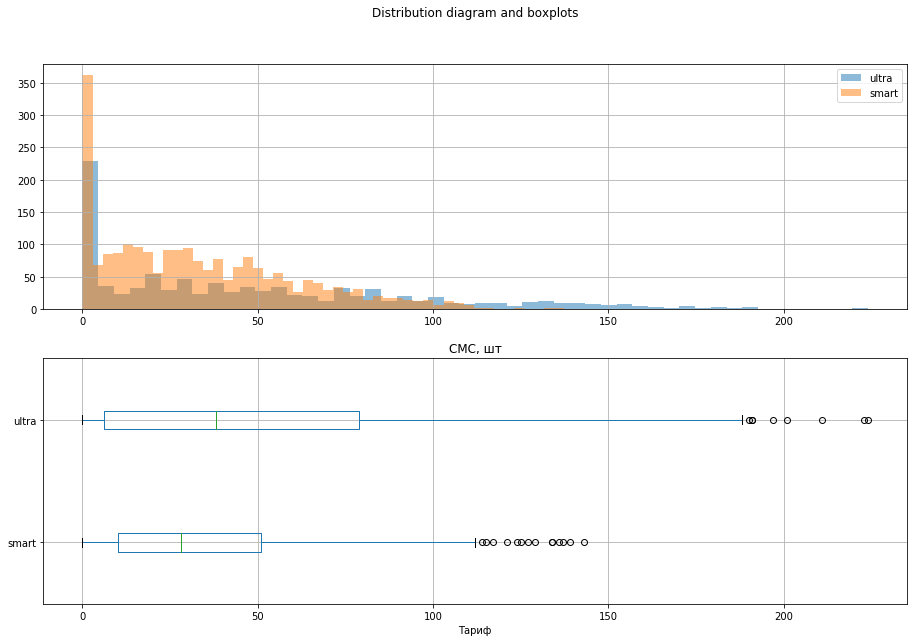

In [104]:
def plot_hist_boxplot(df, group_col, column, title = 'Distribution diagram and boxplots', bins = [50, 50]):
    
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for item in df[group_col].unique():
        axes[0].hist(df.loc[df[group_col] == item, column], bins = bins[0], label = item, alpha = 0.5)
    axes[0].legend()
    axes[0].grid()
    
    df.boxplot(column, by=group_col, ax = axes[1], vert = False)
    fig.suptitle(title)
    
    plt.show()
    
plot_hist_boxplot(df_pivot, 'Тариф', 'СМС, шт')

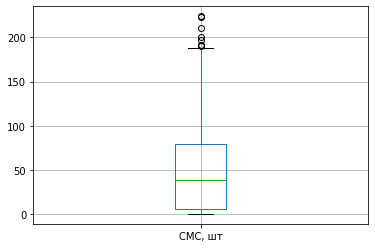

In [105]:
df_ultra_clear.boxplot('СМС, шт')

Let's remove data with the number of SMS from the charts:  
- more than 120 pcs in the Smart tariff  
- more than 180 pcs in the Ultra tariff  

In [106]:
df_smart_clear_filter = df_smart_clear.rename({'СМС, шт':'СМС'}, axis =1)

In [107]:
df_smart_clear_filter = df_smart_clear_filter.query('СМС < 120')

In [108]:
df_ultra_clear_filter = df_ultra_clear.rename({'СМС, шт':'СМС'}, axis =1)

In [109]:
df_ultra_clear_filter = df_ultra_clear_filter.query('СМС < 180')

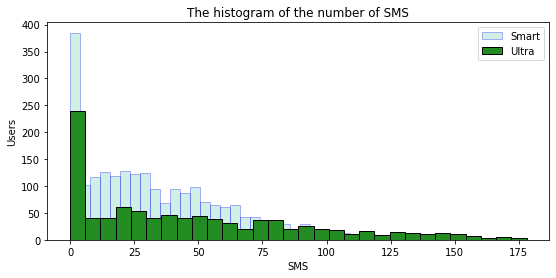

In [110]:
ax = plt.gca()
df_smart_clear_filter.plot(x = 'User_id', y = 'СМС', kind = 'hist', bins = 30, ax = ax, alpha = 0.3, ec='blue', figsize=(9,4), color='mediumaquamarine')
df_ultra_clear_filter.plot(x = 'User_id', y = 'СМС', kind = 'hist', bins = 30, ax = ax, ec='black', figsize=(9,4), color='forestgreen')

plt.legend(['Smart', 'Ultra'])
plt.title('The histogram of the number of SMS')
plt.ylabel('Users')
plt.xlabel('SMS')
plt.show()

In [111]:
df_ultra_final_SMS_mean = df_ultra_clear_filter['СМС'].mean()
df_smart_final_SMS_mean = df_smart_clear_filter['СМС'].mean()
df_ultra_final_SMS_var = np.var(df_ultra_clear_filter['СМС'], ddof=1)
df_smart_final_SMS_var = np.var(df_smart_clear_filter['СМС'], ddof=1)
df_ultra_final_SMS_std = df_ultra_clear_filter['СМС'].std()
df_smart_final_SMS_std = df_smart_clear_filter['СМС'].std()

In [112]:
print('The average number of SMS messages in the Ultra tariff:', int(df_ultra_final_SMS_mean))
print('The average number of SMS messages in the Smart tariff:', int(df_smart_final_SMS_mean))
print('SMS dispersion in the Ultra tariff: {:.2f}' .format(df_ultra_final_SMS_var))
print('SMS dispersion in the Smart tariff:  {:.2f}'.format(df_smart_final_SMS_var))
print('Standard deviation of SMS in the Ultra tariff:  {:.2f}'.format(df_ultra_final_SMS_std))
print('Standard deviation of SMS in the Smart tariff:  {:.2f}'.format(df_smart_final_SMS_std))

The average number of SMS messages in the Ultra tariff: 47
The average number of SMS messages in the Smart tariff: 32
SMS dispersion in the Ultra tariff: 2005.68
SMS dispersion in the Smart tariff:  752.32
Standard deviation of SMS in the Ultra tariff:  44.78
Standard deviation of SMS in the Smart tariff:  27.43


The distribution in the graph is binomial, skewed to the right  
Most of the users of both tariffs do not use SMS, however, among those who use on average more SMS are sent by users of the tariff **Ultra**  
What do you say, SMS are now needed only to receive messages from the bank and send the code there))

#### Distribution by calls:

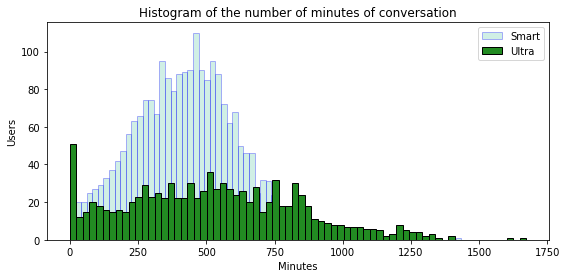

In [113]:
ax = plt.gca()
df_smart_clear.plot(x = 'User_id', y = 'Звонки, мин', kind = 'hist', bins = 70, ax = ax, alpha = 0.3, ec='blue', figsize=(9,4), color='mediumaquamarine')
df_ultra_clear.plot(x = 'User_id', y = 'Звонки, мин', kind = 'hist', bins = 70, ax = ax, ec='black', figsize=(9,4), color='forestgreen')

plt.legend(['Smart', 'Ultra'])
plt.title('Histogram of the number of minutes of conversation')
plt.ylabel('Users')
plt.xlabel('Minutes')
plt.show()

Let's remove the outliers and take a closer look at the data:

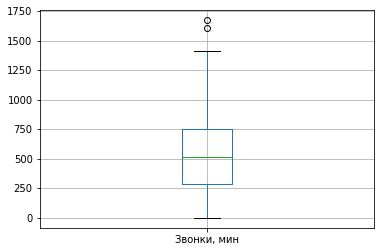

In [114]:
df_ultra_clear.boxplot('Звонки, мин')

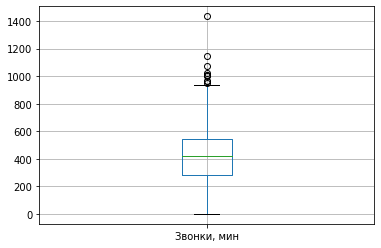

In [115]:
df_smart_clear.boxplot('Звонки, мин')

Exclude values less than more **1400** in the tariff **Ultra** and more **950** in the **Smart tariff**

In [116]:
df_smart_clear = df_smart_clear.rename({'Звонки, мин':'Минуты', 'Интернет, Мб':'Интернет'}, axis =1)

In [117]:
df_smart_clear_filter_calls = df_smart_clear.query('Минуты < 10000')

In [118]:
df_ultra_clear = df_ultra_clear.rename({'Звонки, мин':'Минуты', 'Интернет, Мб':'Интернет'}, axis =1)

In [119]:
df_ultra_clear_filter_calls = df_ultra_clear.query('Минуты < 10000')

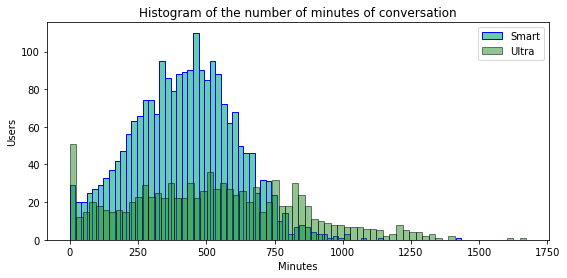

In [120]:
ax = plt.gca()
df_smart_clear_filter_calls.plot(x = 'User_id', y = 'Минуты', kind = 'hist', bins = 70, ax = ax, ec='blue', figsize=(9,4), color='mediumaquamarine')
df_ultra_clear_filter_calls.plot(x = 'User_id', y = 'Минуты', kind = 'hist', bins = 70, ax = ax, alpha = 0.5, ec='black', figsize=(9,4), color='forestgreen')

plt.legend(['Smart', 'Ultra'])
plt.title('Histogram of the number of minutes of conversation')
plt.ylabel('Users')
plt.xlabel('Minutes')
plt.show()

In [121]:
df_ultra_final_Minutes_mean = df_ultra_clear_filter_calls['Минуты'].mean()
df_smart_final_Minutes_mean = df_smart_clear_filter_calls['Минуты'].mean()
df_ultra_final_Minutes_median = df_ultra_clear_filter_calls['Минуты'].median()
df_smart_final_Minutes_median = df_smart_clear_filter_calls['Минуты'].median()
df_ultra_final_Minutes_var = np.var(df_ultra_clear_filter_calls['Минуты'], ddof=1)
df_smart_final_Minutes_var = np.var(df_smart_clear_filter_calls['Минуты'], ddof=1)
df_ultra_final_Minutes_std = df_ultra_clear_filter_calls['Минуты'].std()
df_smart_final_Minutes_std = df_smart_clear_filter_calls['Минуты'].std()

In [122]:
print('The average number of Minutes in the Ultra tariff:', int(df_ultra_final_Minutes_mean))
print('The average number of Minutes in the Smart tariff:', int(df_smart_final_Minutes_mean))
print('The median number of Minutes in the Ultra tariff:', int(df_ultra_final_Minutes_median))
print('The median number of Minutes in the Smart tariff:', int(df_smart_final_Minutes_median))
print('Dispersion of Minutes in the Ultra tariff: {:.2f}' .format(df_ultra_final_Minutes_var))
print('Dispersion of Minutes in the Smart tariff::  {:.2f}'.format(df_smart_final_Minutes_var))
print('Standard deviation of Minutes in the Ultra rate:  {:.2f}'.format(df_ultra_final_Minutes_std))
print('Standard deviation of Minutes in the Smart rate:  {:.2f}'.format(df_smart_final_Minutes_std))

The average number of Minutes in the Ultra tariff: 526
The average number of Minutes in the Smart tariff: 417
The median number of Minutes in the Ultra tariff: 518
The median number of Minutes in the Smart tariff: 422
Dispersion of Minutes in the Ultra tariff: 100873.63
Dispersion of Minutes in the Smart tariff::  36219.32
Standard deviation of Minutes in the Ultra rate:  317.61
Standard deviation of Minutes in the Smart rate:  190.31


The distribution in the graph is binomial with a slight slope to the left  
In the Smart tariff, users mostly do not use prepaid minutes, and a fairly large number of users do not use calls at all  
In the Ultra tariff, despite the fact that 3,000 minutes of conversation are prepaid, users use them quite rarely.  
The average value is only 526 minutes

#### Распределение трафика

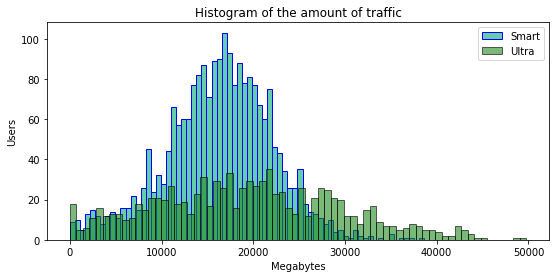

In [123]:
ax = plt.gca()
df_smart_clear.plot(x = 'User_id', y = 'Интернет', kind = 'hist', bins = 70, ax = ax, ec='blue', figsize=(9,4), color='mediumaquamarine')
df_ultra_clear.plot(x = 'User_id', y = 'Интернет', kind = 'hist', bins = 70, ax = ax, alpha = 0.6, ec='black', figsize=(9,4), color='forestgreen')

plt.legend(['Smart', 'Ultra'])
plt.title('Histogram of the amount of traffic')
plt.ylabel('Users')
plt.xlabel('Megabytes')
plt.show()

The graph shows that there are practically no anomalies in the data.  
Let's calculate the mean, median values, as well as the variance and standard deviation

In [124]:
df_ultra_final_Traffic_mean = df_ultra_clear['Интернет'].mean()
df_smart_final_Traffic_mean = df_smart_clear['Интернет'].mean()
df_ultra_final_Traffic_median = df_ultra_clear['Интернет'].median()
df_smart_final_Traffic_median = df_smart_clear['Интернет'].median()
df_ultra_final_Traffic_var = np.var(df_ultra_clear['Интернет'])
df_smart_final_Traffic_var = np.var(df_smart_clear['Интернет'], ddof=1)
df_ultra_final_Traffic_std = df_ultra_clear['Интернет'].std()
df_smart_final_Traffic_std = df_smart_clear['Интернет'].std()

In [125]:
print('The average amount of traffic in the Ultra tariff:', int(df_ultra_final_Traffic_mean))
print('Average amount of Traffic in the Smart tariff:', int(df_smart_final_Traffic_mean))
print('The median amount of Traffic in the Ultra tariff:', int(df_ultra_final_Traffic_median))
print('The median amount of Traffic in the Smart tariff', int(df_smart_final_Traffic_median))
print('Traffic variance in the Ultra tariff: {:.2f}' .format(df_ultra_final_Traffic_var))
print('Traffic variance in the Smart tariff:  {:.2f}'.format(df_smart_final_Traffic_var))
print('Standard deviation of Traffic in the Ultra tariff:  {:.2f}'.format(df_ultra_final_Traffic_std))
print('Standard deviation of Traffic in the Smart tariff:  {:.2f}'.format(df_smart_final_Traffic_std))

The average amount of traffic in the Ultra tariff: 19486
Average amount of Traffic in the Smart tariff: 16229
The median amount of Traffic in the Ultra tariff: 19324
The median amount of Traffic in the Smart tariff 16531
Traffic variance in the Ultra tariff: 101832133.11
Traffic variance in the Smart tariff:  34545911.13
Standard deviation of Traffic in the Ultra tariff:  10096.32
Standard deviation of Traffic in the Smart tariff:  5877.58


The distribution in the graph is binomial.  
The graphs are almost symmetrical with a slight skewness:  
- To the left at the tariff **Ultra**  
- To the right at the tariff **Smart**  
  
In the **Ultra** tariff, subscribers mostly do not use the third part of the traffic.  
In the **Smart** tariff, subscribers, on the contrary, do not have enough traffic.

## 5. Hypothesis testing <a name="paragraph5"></a>

Let 's check the two hypotheses put forward in the task condition:  
- the average revenue of users of the "Ultra" and "Smart" tariffs differs;  
- the average revenue of users from Moscow differs from the revenue of users from other regions;

In [126]:
df_unique.head()

,User_id,Тариф,Город,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб.",Переплата,Общая сумма
0,1000,ultra,Краснодар,68,293.0,2566.0,496.0,107492.0,15600,0.0,0,0.0,0,0,15600
1,1001,smart,Москва,23,92.0,844.0,0.0,32505.0,1100,0.0,0,3092.0,800,1,1900
2,1002,smart,Стерлитамак,63,173.0,1517.0,70.0,116183.0,3850,0.0,0,14607.0,3400,1,7250
3,1003,ultra,Москва,50,428.0,3822.0,380.0,57329.0,9750,0.0,0,0.0,0,0,9750
4,1004,ultra,Новокузнецк,68,139.0,987.0,1192.0,149172.0,15600,0.0,0,0.0,0,0,15600


### 5.1. Hypothesis: the average revenue in tariffs varies <a name="paragraph5_1"></a>

- **H0 (null hypothesis)** - the assumption that the average revenue of users of the **Smart** tariff does not differ from the average revenue of users of the **Ultra** tariff.  
- **H1 (alternative hypothesis)** - the average revenue of users of the **Smart** tariff differs from the average revenue of users of the **Ultra** tariff.  
The null hypothesis was put forward about the equality of revenue to confirm or refute the statement of the hypothesis, since when testing the hypothesis about the equality of two independent aggregates, it is necessary to formulate a null hypothesis asserting the assumption of equality of values.

To test the hypothesis, we will use a dataframe containing information about expenses grouped by unique users, since in the task condition there is a question of checking * the average revenue of users*

First, let's clear the data from outliers:

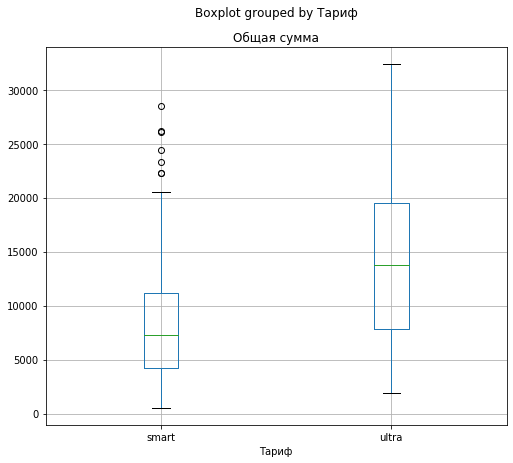

In [127]:
df_unique.boxplot(column='Общая сумма', by='Тариф', figsize=(8,7))
#numpy.warnings.filterwarnings('ignore', category=numpy.VisibleDeprecationWarning)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

Exclude abnormal values from the sample:
- for the **Ultra** tariff, these are values less than 1,950 rubles and more than 35,000 rubles
- for the **Smart** tariff, these are values less than 550p and more than 20 000p

In [128]:
df_unique = df_unique.rename({'Общая сумма': 'Общая_сумма'}, axis = 1)

In [129]:
df_pivot.head()

,User_id,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Тариф,Город,Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб."
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0


In [130]:
#df_unique_hip_sum_smart = df_unique.query('Тариф == "smart" & Общая_сумма > 500 & Общая_сумма < 20000')
#df_unique_hip_sum_ultra = df_unique.query('Тариф == "ultra" & Общая_сумма > 1950 & Общая_сумма < 35000')

In [131]:
df_unique_hip_sum_smart = df_unique.query('Тариф == "smart"')
df_unique_hip_sum_ultra = df_unique.query('Тариф == "ultra"')

In [132]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
    df_unique_hip_sum_smart['Общая_сумма'], 
    df_unique_hip_sum_ultra['Общая_сумма'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis") 

p-значение: 5.757827537658176e-16
We reject the null hypothesis


In [133]:
[np.var(x, ddof=1) for x in [df_unique_hip_sum_smart['Общая_сумма'],df_unique_hip_sum_ultra['Общая_сумма']]]

[29429690.61603766, 47227082.184225045]

In [134]:
from scipy.stats import levene
stat, p = levene(df_unique_hip_sum_smart['Общая_сумма'],df_unique_hip_sum_ultra['Общая_сумма'])
p

1.0386083597870343e-05

The hypothesis put forward in the task condition was confirmed:  
- The expenses of subscribers of the **Smart** and **Ultra** tariffs differ  
- Subscribers with the **Smart** tariff spend less than the operator's customers who chose the **Ultra tariff**  
  
This is expected, since the cost of the **Ultra** tariff is three times higher than the cost of services under the **Smart tariff**  
Even though users of the **Smart** tariff often go beyond prepaid services.  
The data obtained from the results of hypothesis testing can also be confirmed by a simple comparison of average values:

In [135]:
print('Average revenue of the Smart tariff - {:.2f}'.format(df_unique_hip_sum_smart['Общая_сумма'].mean()))
print('Average revenue of the Ultra tariff - {:.2f}'.format(df_unique_hip_sum_ultra['Общая_сумма'].mean()))

Average revenue of the Smart tariff - 8245.00
Average revenue of the Ultra tariff - 13783.78


### 5.2. Hypothesis - the average revenue of users from Moscow differs from the revenue of users from other regions <a name="paragraph5_2"></a>

To begin with, we will filter the data by residents of the cities of Russia and Moscow and save them in different tables:

In [136]:
df_unique_moscow = df_unique.query('Город == "Москва"')
df_unique_cities = df_unique.query('Город != "Москва"')

Let's put forward the null and alternative hypotheses:  
- **H0 (Null hypothesis)** - the average revenue of users from Moscow is equal to the revenue of users from other regions;  
- **H1 (Alternative hypothesis)** - the average revenue of users from Moscow differs from the revenue of users from other regions;  
Also, as in the previous case, **H0** was chosen precisely about the equality of revenue, since when comparing independent samples, it is necessary to confirm or refute the equality of data.

Let's see if there are emissions and get rid of them:

In [137]:
df_unique.head()

,User_id,Тариф,Город,Месяц,"Кол-во звонков, шт","Звонки, мин","СМС, шт","Интернет, Мб",Аб. плата,Минуты_Extra,СМС_Extra,Мб_Extra,"Плата сверх лимита, руб.",Переплата,Общая_сумма
0,1000,ultra,Краснодар,68,293.0,2566.0,496.0,107492.0,15600,0.0,0,0.0,0,0,15600
1,1001,smart,Москва,23,92.0,844.0,0.0,32505.0,1100,0.0,0,3092.0,800,1,1900
2,1002,smart,Стерлитамак,63,173.0,1517.0,70.0,116183.0,3850,0.0,0,14607.0,3400,1,7250
3,1003,ultra,Москва,50,428.0,3822.0,380.0,57329.0,9750,0.0,0,0.0,0,0,9750
4,1004,ultra,Новокузнецк,68,139.0,987.0,1192.0,149172.0,15600,0.0,0,0.0,0,0,15600


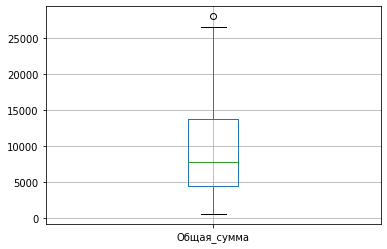

In [138]:
df_unique_moscow.boxplot('Общая_сумма')

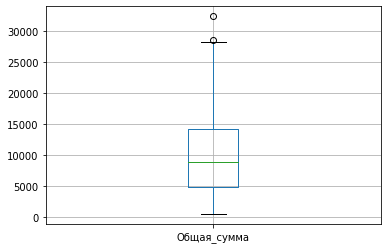

In [139]:
df_unique_cities.boxplot('Общая_сумма')

Let's get rid of the values:  
- values less than 550rubles (minimum fee according to the tariff **Smart**)  
- values above 26 000rubles in **Moscow**  
- values above 27500rubles in **regions**  

In [140]:
#df_unique_cities_filter = df_unique_cities.query('Общая_сумма > 550 & Общая_сумма < 27500')
#df_unique_moscow_filter = df_unique_moscow.query('Общая_сумма > 550 & Общая_сумма < 26000')

In [141]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
    df_unique_cities['Общая_сумма'], 
    df_unique_moscow['Общая_сумма'], equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis") 

p-value: 0.5901203921199348
It was not possible to reject the null hypothesis


Let's compare the conclusions with the average revenue data:

In [142]:
print('average revenue in regions', df_unique_cities['Общая_сумма'].mean())
print('average revenue in Moscow', df_unique_moscow['Общая_сумма'].mean())

average revenue in regions 9970.448621553885
average revenue in Moscow 9571.131313131313


Considering that this is data on average revenue from a subscriber for the entire period of time, the difference in average revenue of 509 rubles fits well into the statistical error and can be considered insignificant.

The hypothesis put forward in the task condition turned out to be ** not true**.  
Muscovites and residents of other Russian cities spend money on cellular communications and mobile Internet in approximately the same way.

## 6. General conclusion <a name="paragraph6"></a>

#### We will output general and average data on user expenses and overpayments:

In [143]:
df_pivot['Общие расходы'] = df_pivot['Аб. плата'] + df_pivot['Плата сверх лимита, руб.']

In [144]:
df_pivot_mean = df_pivot.pivot_table(index = 'Тариф', values = ['Аб. плата', 'Звонки, мин', 'СМС, шт', 'Интернет, Мб', 'Минуты_Extra', 'СМС_Extra', 'Мб_Extra', 'Плата сверх лимита, руб.', 'Общие расходы' ], aggfunc = 'mean')
df_pivot_mean = df_pivot_mean.reindex(columns = ['Аб. плата', 'Звонки, мин', 'СМС, шт', 'Интернет, Мб', 'Минуты_Extra', 'СМС_Extra', 'Мб_Extra', 'Плата сверх лимита, руб.', 'Общие расходы'])
df_pivot_mean = df_pivot_mean.astype('int')

In [145]:
df_uniuq_id = df_unique.pivot_table(index = 'Тариф', values = 'User_id', aggfunc = 'count')
df_uniuq_sms_extra = df_unique.query('СМС_Extra > 0').pivot_table(index = 'Тариф', values = 'СМС_Extra', aggfunc = 'count')
df_uniuq_sms_extra = df_uniuq_sms_extra.rename({'СМС_Extra': 'Превысили лимит СМС'}, axis=1)
df_uniuq_min_extra = df_unique.query('Минуты_Extra > 0').pivot_table(index = 'Тариф', values = 'Минуты_Extra', aggfunc = 'count')
df_uniuq_min_extra = df_uniuq_min_extra.rename({'Минуты_Extra': 'Превысили лимит Минут'}, axis=1)
df_uniuq_traf_extra = df_unique.query('Мб_Extra > 0').pivot_table(index = 'Тариф', values = 'Мб_Extra', aggfunc = 'count')
df_uniuq_traf_extra = df_uniuq_traf_extra.rename({'Мб_Extra': 'Превысили лимит Трафика'}, axis=1)


In [146]:
df_final = (pd.concat([df_uniuq_id, df_pivot_mean, df_uniuq_sms_extra, df_uniuq_traf_extra, df_uniuq_min_extra], sort=True, axis = 1)
.rename({'User_id': 'Всего абонентов', 'Звонки, мин': 'Минуты, ср', 'СМС, шт': 'СМС, ср', 'Интернет, Мб': 'Трафик,ср', 'Минуты_Extra':'Перерасход минут, ср', 'СМС_Extra': 'Перерасход СМС, ср', 'Мб_Extra': 'Перерасход трафика, ср', 'Плата сверх лимита, руб.': 'Переплата, ср', 'Общие расходы': 'Общие расходы, ср'}, axis = 1)
.fillna(0).astype('int')
           )

### Summary table on average user expenses of MEGALINE operator tariffs

In [147]:
df_final

,Всего абонентов,Аб. плата,"Минуты, ср","СМС, ср","Трафик,ср","Перерасход минут, ср","Перерасход СМС, ср","Перерасход трафика, ср","Переплата, ср","Общие расходы, ср",Превысили лимит СМС,Превысили лимит Трафика,Превысили лимит Минут
smart,350,550,417,33,16229,41,5,2770,744,1294,125,312,213
ultra,148,1950,526,49,19486,0,0,754,121,2071,0,43,0


### Histogram of profitability of Smart and Ultra tariffs of MEGALINE operator

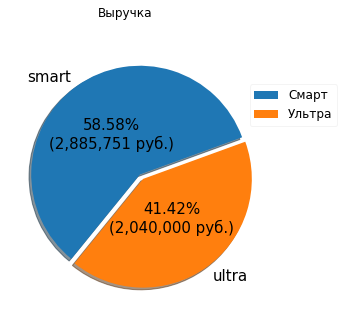

In [148]:
all_revenue = df_pivot['Общие расходы'].sum()

def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_pivot.groupby('Тариф')['Общие расходы'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

In the **Smart** tariff, most subscribers exceed the minutes limit and, with a few exceptions, exceed the traffic limit. They rarely go beyond the SMS limit.  
On average, users of the **Smart** tariff do not have enough:  
- 2.7GB of traffic (almost 270% of the limit)  
- 41 minutes  
- 5 SMS  
Accordingly, subscribers of the **Smart** tariff overpay an average of 739 rubles, which exceeds the subscription fee for the tariff.  
  
In the **Ultra** tariff, most of the users fit into the tariff framework. Only 43 subscribers have an average traffic overrun of 750Mb  
Average expenses of subscribers **Ultra**:  
- 19.5GB of traffic  
- 526 minutes of conversation  
  
Despite the fact that the **Ultra** tariff is used by a much smaller number of users than the **Smart** tariff, **Ultra** brings the operator slightly less revenue than the **Smart tariff**  
  
**Output:**  
1. Users of the **Smart** tariff are willing to spend more money in order to stay online.  
The operator should think about developing a tariff for active Internet users, otherwise he faces the possibility of losing these customers.  
I would suggest increasing the amount of redeemable traffic to 4GB without increasing the limit on minutes and SMS.
And the amount of the subscription fee should be increased to 990 rubles (in order not to go beyond the psychological barrier of 1000).  
This will allow users to always stay in touch and save money, and the operator will not lose customers and avoid additional costs (due to overspending minutes in the **Smart** tariff and saving on users of the **Ultra** tariff).  
2. Users of the **Ultra** tariff do not use prepaid minutes and traffic.  
For them, you can create a tariff with fewer minutes and traffic, with a moderate discount  
Or offer them a refund of the saved services with bonuses.  
3. An alternative solution for users of both tariffs may be to create a tariff with a *slider* that can be moved between minutes and traffic